In [ ]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Necessary Imports
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.utils import make_grid
import os
from torchvision import transforms

from tensorflow.keras.preprocessing.image import img_to_array

from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
#Loading data
from tensorflow.keras.utils import load_img

path = '/content/drive/MyDrive/Colab Notebooks/final/final/train'

train_x = []
train_y = []

# k = 0
label = 0

for i in os.listdir(path):    # loop inside each folder
  
  folder_path = os.path.join(path,i)    # updating path till folder
  for j in os.listdir(folder_path):   # loop for each image inside class
    img = load_img(os.path.join(folder_path,j), target_size=(128,128))   # Loding image with target size
    img = img_to_array(img)    # convert image into array
    train_x.append(img)     # append img array to list
    train_y.append(int(label))  #converting label in to integer and append it to list
  label += 1
    # break
  # break
train_x = np.array(train_x)
train_y = np.array(train_y)



/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
print("shape of x_train: ", train_x.shape)
print("shape of x_train: ", train_y.shape)

shape of x_train:  (10666, 128, 128, 3)
shape of x_train:  (10666,)


In [ ]:
from tensorflow.keras.utils import load_img

path = '/content/drive/MyDrive/Colab Notebooks/final/final/test'

test_x = []
test_y = []

label = 0
for i in os.listdir(path):
  
  folder_path = os.path.join(path,i)
  for j in os.listdir(folder_path):
    img = load_img(os.path.join(folder_path,j), target_size=(128,128))   #loding image with target size
    img = img_to_array(img)
    test_x.append(img) 
    test_y.append(int(label))   #converting label in to integer
  label += 1

test_x = np.array(test_x)
test_y = np.array(test_y)


In [ ]:
print("shape of x_test: ", test_x.shape)
print("shape of x_test: ", test_y.shape)

shape of x_test:  (5876, 128, 128, 3)
shape of x_test:  (5876,)


In [ ]:
#converting in to 1D Array
train_x /= 255.
test_x /= 255.

In [ ]:
from sklearn.utils import shuffle

d = shuffle(train_x, train_y)   #shuffle data

In [ ]:
from sklearn.model_selection import train_test_split
x = d[0]
y = d[1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)  #split 80/20 for training and testing

In [ ]:
# reshape data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2]*X_train.shape[3]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]*X_test.shape[2]*X_test.shape[3]))

In [ ]:
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import  MaxPooling2D,BatchNormalization,Dense,Flatten,Dropout

In [ ]:
#Build the Model
model = Sequential([
    Flatten(),
    Dense(128, activation= 'relu'),
    Dropout(0.2),
    Dense(5, activation='softmax')
])

In [ ]:
#Compile & Train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])   #calculates how often prediction equal lables

In [ ]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
267/267 [==============================] - 13s 44ms/step - loss: 1.8334 - accuracy: 0.6704 - val_loss: 0.6750 - val_accuracy: 0.7760
Epoch 2/20
267/267 [==============================] - 12s 45ms/step - loss: 0.7551 - accuracy: 0.7167 - val_loss: 0.6338 - val_accuracy: 0.7732
Epoch 3/20
267/267 [==============================] - 12s 44ms/step - loss: 0.7349 - accuracy: 0.7186 - val_loss: 0.6261 - val_accuracy: 0.7746
Epoch 4/20
267/267 [==============================] - 12s 44ms/step - loss: 0.8240 - accuracy: 0.6501 - val_loss: 0.6863 - val_accuracy: 0.7427
Epoch 5/20
267/267 [==============================] - 12s 43ms/step - loss: 0.7448 - accuracy: 0.7079 - val_loss: 0.6395 - val_accuracy: 0.7830
Epoch 6/20
267/267 [==============================] - 12s 47ms/step - loss: 0.7140 - accuracy: 0.7223 - val_loss: 0.5985 - val_accuracy: 0.7910
Epoch 7/20
267/267 [==============================] - 12s 44ms/step - loss: 0.7131 - accuracy: 0.7233 - val_loss: 0.6075 - val_accuracy:

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 128)               6291584   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 6,292,229
Trainable params: 6,292,229
Non-trainable params: 0
_________________________________________________________________


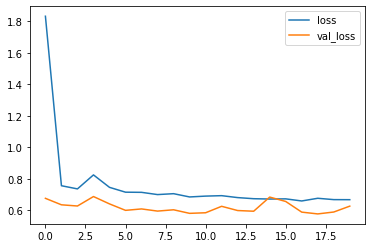

In [ ]:
#Plotting Loss per Iteration
plt.plot(r.history['loss'], label= 'loss')
plt.plot(r.history['val_loss'], label= 'val_loss')
plt.legend()

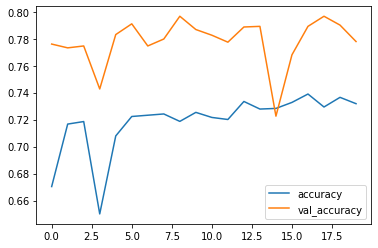

In [ ]:
#Plotting Accuracy per Iteration
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label= 'val_accuracy')
plt.legend()

In [ ]:
#Model Evaluation
print(model.evaluate(X_test, y_test))

67/67 [==============================] - 1s 10ms/step - loss: 0.6253 - accuracy: 0.7779
[0.6252636909484863, 0.777881920337677]


Confusion matrix without normalization
[[ 238    0   17    0   42]
 [ 149    0   13    0    5]
 [ 132    0  179    0   11]
 [  49    0    5    0    1]
 [  50    0    0    0 1243]]


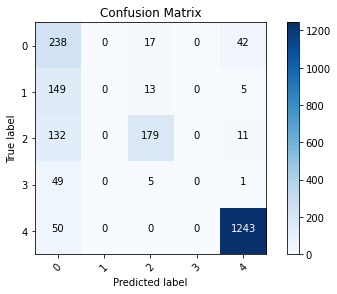

F1 Score:0.7778819119025304
Recall Score:0.7778819119025304
Precision Score0.7778819119025304


In [ ]:
#Confusion Matrix


def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title="Confusion Matrix",
                          cmap = plt.cm.Blues):
  
  """
  This function prints and plots the confusion matrix.
  Normalize can be applied by setting 'normalize = True'
  """
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  
  else:
    print("Confusion matrix without normalization")
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = 'center',
             color = "white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(5)))

print("F1 Score:"+str(f1_score(y_test,p_test,average='micro')))
print("Recall Score:"+str(recall_score(y_test,p_test,average='micro')))
print("Precision Score"+str(precision_score(y_test,p_test,average='micro')))